In [7]:
%matplotlib inline

# 계층적 클러스터링

### 클러스터간 거리측정
- 여기서는 데이터 간의 거리가 아니고 클러스터간의 거리를 측정하는 방법
- 두가지 방법 = 비귀납적인 방법(일반적)/ 귀납적방법(클러스터에서만 쓸수있음)

### 비귀납적 방법
- centroid : centroid간의 거리가 클러스터간의 거리다.

### 귀납적 방법
- 여기서만 쓸수있음

### SciPy에 
- linkage는 계층적 클러스터를 해줌
- dendrogram은 그래프를 만들어줌

##### `Z = linkage(X, 'ward')`를 하면 4컬럼짜리 데이터 반환
- 1,2 컬럼은 data index 를 예기함 ex 52번 53번데이터가 먼저 합쳐져라
- 3은 클러스터간의 거리 (처음이니깐 데이터 간의 거리겠죠)
- 합쳐진 클러스터의 원소의 갯수

- 여기 150개의 데이터갯수인데 152번이라는 클러스터가있음
- 이거는 뭐야? 맨처음에 나온 33-68합친 클러스터

#### 이거를 그림으로 그린것이 dendrogram
- 세로축 data num
- 세로선의 위치는 언제 합쳐졌냐 => 똑같은 타이밍에 합펴진 것은 없음
- 여기서 data의 나열 순서는?
    - 비슷한애들이 근접해있도록 재배열됨
    - 52와 53이 제일 비슷 그다음이 14와 79 그다음 33과 68 ... 
    - 그래서 제일 비슷한 애들끼리 뭉쳐있게 됨
    - 일종의 유사도 sorting => 어디에 쓸까?
    - X의 차원이 엄청많은 data가 있을때 corr의 heatmap을 보여줬었음
    - 컬럼을 데이터라고 보고 재배치를 하면 유사한 애들끼리 옆에 붙도록 만들어줌
    - 대각선축은 유사도가 높고 가로 갈수록 유사도가 낮은애들로 clustering이 됨

-----

# 가우시안 mixturemodel

가우시안 분포가 여러개있을 때 합치면 그것은 가우시안임 

### 베르누이-가우시안 혼합 모형
- 나온 데이터가 observations
- 1이선택될확률 75% 2가 선택될 확률이 25%
- 1이 선택된다음 component densities의 14.2가 선택
- 반복
- 우리가눈에 보이는 애는 observation임
- 그럼 문제는 이 데이터가 어느 정규분포에서 나왔는지를 모름
- 그래서 우리가 클러스터링을 해줌으로서 어디서 왔는 지를 알아냄
- 우리가 히스토그램을 그렸을 때 그확률분포 모델의 모수값을 알고 싶다!
- 이것들을 어떻게 알수있지...?
- 분류를 이용해볼까?

### 가우시안 혼합모형과 모수 추정과 내재변수모형

데이터x가 여러개가있는데 독립이라고 가정하고 곱하기를 하면 전체데이터가 나올확률
- LL은 로그안에 sumation이 되있어서 더이상 쪼갤수 없음
- 그래서 expectaion maximazation = EM방법

- 과일이 어느박스에서 나왔는지를 확인할때 분류를 해봤음
- 빨간통 파란통을 조건부로 한번 했었음

##### 식
- i가 k 번째 normal 분포에서 나온것임
- 박스의 수가 늘어난것 뿐이고 똑같은 것임
- parameter estimation이 끝났으면 classification이 가능하다
- 그런데 그렇지않아!
- 그래서 mu로 미분해보면 아래의 식
- 여기식에 감마가나오는데 감마는 처음 베르누이의 확률
- 감마는 1, 0 으로 필터링을 시킴
- k 번째 클러스터만 속한 애들만 더하고 그갯수로 나눠주면 그 클러스터의 평균이 나옴
- 그래서 구할수 있음! (단 두개로 구분해서 어디서 나왔는지 알수 있을때)
- 분류가 다되있는 상황이면 다할수 있어! 당연하게!
- 모수를 정확히 할수 있으면 classification을 정확히할수있음
- 반대도 똑같음
- 어떤 모수를 가정하고 clustering을 함 그 clustering을 보고 모수를 구함
- 이작업을 계속 반복하면 어느값에 수렴한다.
- k-means에서 했었음!
- 여기서는 모형이 아니고 centroid라고 함


### Scikit-Learn의 GaussianMixture 클래스

In [3]:
from numpy.random import randn

n_samples = 500

mu1 = np.array([0, 0])
mu2 = np.array([-6, 3])
sigma1 = np.array([[0., -0.1], [1.7, .4]])
sigma2 = np.eye(2)

np.random.seed(0)
X = np.r_[1.0 * np.dot(randn(n_samples, 2), sigma1) + mu1,
          0.7 * np.dot(randn(n_samples, 2), sigma2) + mu2,
         ]
plt.scatter(X[:, 0], X[:, 1], s=5)
plt.show()

In [1]:
from sklearn.mixture import GaussianMixture

In [4]:
# 어느 class에 속해있는 지를 다 구해줌
model = GaussianMixture(n_components=2, init_params='random', random_state=0, max_iter=1)
model.fit(X)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\mixture\base.py:237: ConvergenceWarning: Initialization 1 did not converge. Try different init parameters, or increase max_iter, tol or check for degenerate data.
  % (init + 1), ConvergenceWarning)


GaussianMixture(covariance_type='full', init_params='random', max_iter=1,
        means_init=None, n_components=2, n_init=1, precisions_init=None,
        random_state=0, reg_covar=1e-06, tol=0.001, verbose=0,
        verbose_interval=10, warm_start=False, weights_init=None)

In [5]:
gamma = model.predict_proba(X)

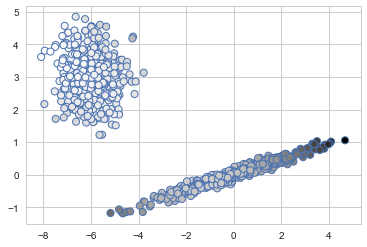

In [8]:
plt.scatter(X[:, 0], X[:, 1], s=50, linewidth=1, edgecolors="b", cmap=plt.cm.binary, c=gamma[:, 0])
plt.show()

In [9]:
def plot_gaussianmixture(n, k=10):
    model = GaussianMixture(n_components=2, init_params='random', random_state=1, tol=1e-9, max_iter=n)
    model.fit(X)
    gamma = model.predict_proba(X)
    plt.scatter(X[:, 0], X[:, 1], s=50, linewidth=1, edgecolors="b", cmap=plt.cm.binary, c=gamma[:, 0])
    plt.show()
    return model

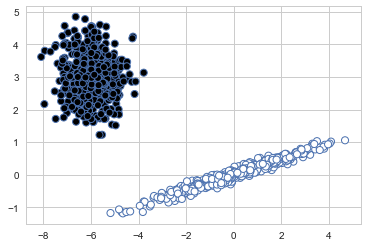

In [10]:
plot_gaussianmixture(20);

-----

# 히든 마코프 모형(Hidden Markov Model)

- 한번 어떤 것이 나오면 그뒤록 새로운 확률이 주어지는 것
- 2일때는 확률이 저렇게 되는데 어쩌다 1로 가면 또 저렇게 될확률이 높아짐
- 이것이 마코프 체인의 형태임
- 현실생활의 대부분의 것들이 저렇게 쓰임
- ex) 주식은 가우시안 분포
    - 1%근처의 값이 자주나옴(기댓값이 1%)
    - 이것은 좋은 주식임!
    - -3%를 기댓값이 나올 확률을 가진 주식
    - 거시 경제학 = 경제의 cycle의 존재를 증명
- 대세 하락인지 대세 상승인지를 마코프체인의 첫부분이랑 비슷
- 그럼 뒷부분은? 그 대세에 따른 확률분포
- 

------

# 분류용 가상 데이터 생성 방법

`make_classification`라는 명령이 많이쓰임

In [11]:
from sklearn.datasets import make_classification

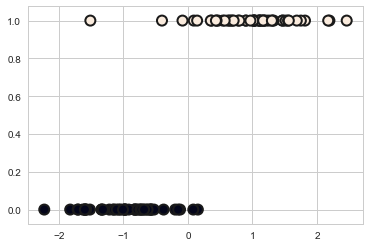

In [12]:
X, y = make_classification(n_features=1, n_informative=1, 
                           n_redundant=0, n_clusters_per_class=1, random_state=4)
plt.scatter(X, y, marker='o', c=y, 
            s=100, edgecolor="k", linewidth=2)
plt.show()

0보다 작은 것은 0 / 0보다 큰 것은 1 로 일단 나눔

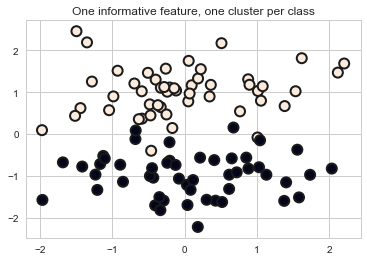

In [13]:
plt.title("One informative feature, one cluster per class")
X, y = make_classification(n_features=2, n_informative=1, n_redundant=0, 
                           n_clusters_per_class=1, random_state=4)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, 
            s=100, edgecolor="k", linewidth=2)
plt.show()

x2만 영양가 있음

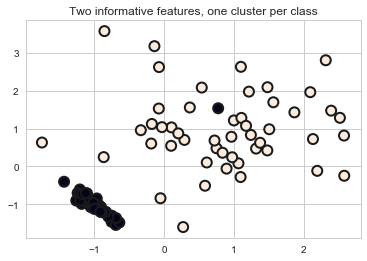

In [14]:
plt.title("Two informative features, one cluster per class")
X, y = make_classification(n_features=2, n_informative=2, n_redundant=0, 
                           n_clusters_per_class=1, random_state=6)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, 
            s=100, edgecolor="k", linewidth=2)
plt.show()

둘다 영양가 있어서 기울기로..

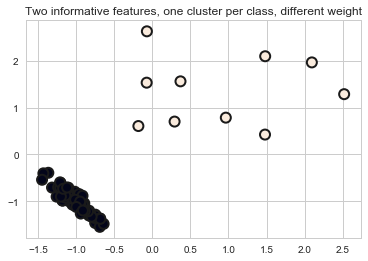

In [15]:
plt.title("Two informative features, one cluster per class, different weight")
X, y = make_classification(n_features=2, n_informative=2, n_redundant=0, 
                           n_clusters_per_class=1, weights=[0.9, 0.1], random_state=6)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, 
            s=100, edgecolor="k", linewidth=2)
plt.show()

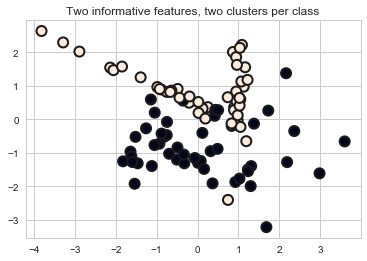

In [16]:
plt.title("Two informative features, two clusters per class")
X2, Y2 = make_classification(n_features=2, n_informative=2, n_redundant=0, 
                             random_state=2)
plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2, 
            s=100, edgecolor="k", linewidth=2)
plt.show()

- 각 클래스를 나타내는 것들이 가우시안 믹스쳐모델임

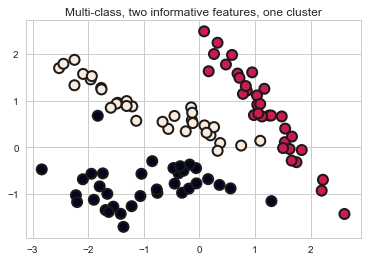

In [17]:
plt.title("Multi-class, two informative features, one cluster")
X, y = make_classification(n_features=2, n_informative=2, n_redundant=0, 
                           n_clusters_per_class=1, n_classes=3)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y, 
            s=100, edgecolor="k", linewidth=2)
plt.show()

3개로 나눔

In [18]:
from sklearn.datasets import make_blobs

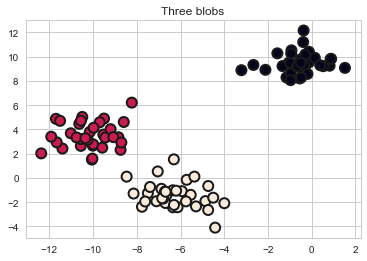

In [19]:
plt.title("Three blobs")
X1, Y1 = make_blobs(n_features=2, centers=3)
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1, s=100,
            edgecolor="k", linewidth=2)
plt.show()

다른 명령어를 사용함

------

# Scikit-Learn의 전처리 기능

- 앞으로 우리는 logistick빼고는 scikit learn을 사용할거임

### 스케일링
- 4가지함수를 제공한다.
    - scale = 평균을 0으로 표편을 1로만듦
    - robust = 양수 음수 갯수가 똑같음
    - ...

- 일반적은 scale은 0이 아니고 위로 많이 올라감
- robu 는 많이 안올라감
- ...
- 이런것들이 중요한게 아님 실제로 사용하지않아 이함수들은!
- 실제로는 클래스사용

`StandardScaler` 이것을 실제로 사용

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data1)
data2 = scaler.transform(data1)

data1.std(), data2.std()

cross validation 때문에 이렇게함
- fit이 평균 표편을 구하고 그것을 scaler에 저장

### 정규화 (Normalization)
- 모든 데이터 X는 원점으로 부터 그점에 이르는 화살표로 나타낼수 있는데 그벡터의 크기를 1로 강제로 만들어줌
- 데이터 하나하나를 norm값으로 나눠줌
- 적용하면 원의 호에 안착
- X의 비율이 요구될때 사용

### 인코딩(Encoding)
- 여기서는 이것을 하기위한 one hot encoder 객체를 만들어야함
- 그후 거기에다가 데이터를 집어넣고 fitting을 해야함
- 3컬럼으로 확장하면 되겠다 라고 하는것이 fitting
- 000100
- 001000
- 여기서 0을 저장하는 메모리가 아깝다! 해서 하는 것이 ...?
- ohe.transform(X)은 인코딩해줌 근대 눈엔 안보여
- toarray()로 우리 눈에 보이게함
- categorical_features=[False, True, False]를 써서 카테고리다 아니다를 확인

### Imputer
- 우리가 어떻게 채울지 지정가능

### Binarizer
- 기준치를 정해놓고 0,1로 구분

### PolynomialFeatures
- 다항회귀에서 실제 컬럼은 하나밖에 없는데 여러개의 컬럼을 만들었었잖아
- 그것을 자동으로 해줌

### FunctionTransformer
- 내가 몇번째열만 때서 어떻게 만들거야를 사용

##### --------- 여기 까지는 X값을 처리하는 전처리 ---------

### Label Encoder
- y값에 문자가 들어갈수도 있는데 그것을 직접 scikit learn이 처리할수 없음
- 그래서 숫자로 바꿔줌 ex 0,1,2,3
- label이 붙어있는 y값전처리 특징은 inverse transform이라는 메소드가 들어있음
- A, B, C 를 0, 1, 2 로 바꾼다음 분석하고 A, B, C 로 다시바꿔주는 것

### Label Binarizer
- 예는 아까그 binarizer가 아니야!
- 여기서는 one hot encoder라는 뜻임
- y데이터가 벡터인것 본적있나요? 없었죠!
- 이것을 왜해야 되는가.... 이것은 나중에 multi class classification에서 설명해주께연

-----

# 분류의 기초

- 다양한 방법이있는데 근본을 따지면 두가지로 분류
- 확률적인것과 확률적이지 않은것
- 확률적인것은 X가 주어지면 y를 예측하는것
    - P(y|X) 는 X가 주어졌을때 y의 확률 분포
    - 이것은 함수 = 조건부 확률을 계산하는...
- 조건부확률 이용과 조건부확률을 이용하지않는 것으로 나눔
- 그냥 함수를 이용해서 의사판단 그래서 이함수를 `판별함수`라고 함(=discriminant function)
- 그런데 확률을 계산할때도 두가지로 나눔
    - 베이즈정리
        - 기본적으로 joint 분포를 구해서 조건부를 구하는 것
        - 이것을 `생성모형`이라고 함
        - 꼭 joint를 한 것을 알아야 구할수 있느냐? 그렇지않아
    - f(x)라는 함수를 만들어버려
        - 얘가 잘판단할수 있도록 함수안에  w값을 찾아냄
        - 그래서 다이렉트로 분포를 찾아낼수 있는것
        - `판별 모형`
- 확실한 것은 아니야!

### 조건부 확률 방법
- 다계산 한것중 제일 확률값이 큰것을 선택하는 것
- 만약 조건부 확률 모형일 경우 scikitlearn에서
- predict_proba 확률이 얼마가 나왔었는지 각각의 확률값을 보여줌 (내부과정을 보여줌) 
- predict_log_proba 은 당연히 로그 취한값을 보여줌
- QDA는 다음시간에 구체적으로 사용함

### QDA
- 그냥한번 써보자!
- 확률 모형이면서 생성모형 = 조건부확률을 다구하는 방식
- 모형이 수학적으로 복잡한 대신에 class가 몇개든 상관없이 여러개여도 모형을 바꾸지않고 바로 적용

### 나이브 베이지안 모형
- 클래스 갯수에 상관없음
- 20개의 게시판중 어느게시판에 속하냐
- `predict_proba` 를 사용하면 1차원 배열이나옴
- 답을 하나만 찍어라하면 3번이 나오겠죠
- 아래있는것은 `predict_log_proba`를 썼음
    - 이것은 눈에 명확히 보이지않는 세밀한 차이가 보이고
    - 그것 보다는 원래 log를 취한 것을 먼저 씀 여러 장점이있음

### 로지스틱 회귀 모형
- 회귀모형임!
- 회귀와 분류 둘다 가능
- 어떻게 하는애냐?
- binary classification 을 기본적으로 쓰임
- 1일 확률과 0일 확률 다구할 필요 없음 하나만 구하면 앎
- x가 들어감에 따라서 값이 높아졌다 낮아졌다 한다
- 이건 함수잖아! 어떤함수? y값이 0,1 사이에 있는 함수
- discreminant 모형인데 판별모형
- 이 함수 모형을 다이렉트로 구함
- 함수의 형태를 박아놓고 제일 비슷한 모양이 되는 애를 최적화롤 찾아버림
- predict proba면 파란 선만 출력해줌
- 여기서는 0.5보다 큰지 작은지
- 기본 적으로 multi class에 적용하는 것은 어려움 but 불가능은 아니다
- 영역으로 x값이 나눠지는 특성을 가짐
- 그러면 기준점 위치만 알면 끝이잖아 그래서 왜 확률 계산 복잡하게하냐
- 나는 기준점 위치만 찾겠다. = 판별 함수 기반 모형

### 판별 함수 기반 모형
- 여기서는 기준이 선으로 바뀜
- 어떤함수가 0 인애는 해의 집합이 선이된다.
- 기준선이 되는 함수를 찾으려고 노력한다.
- 기준선이 0이면 그것보다 큰거는 0보다 큰것 작은거는 0보다작은것
- 우리가 함수를 구하면 테스트 x데이터를 넣으면 predict 해줌

#### 그것중 가장 간단한 것이 퍼셉트론
- 직선의 형태로만 찾아줌
- 이 선이 f값이 0인 지점
- 이 라인을 비유로 들면 f(x)라는 함수의 등고선 (값이 0 이되는 등고선 , 실제로 등고선 명령어)
- 해발 0m 는 해안선!
- 만약 더 높은 차원이면??
- ex 3차원이면 면 4차원이면 어떤 볼륨
- 반드시 직선일 필요는 없음

#### 커널 SVM
- 곡선을 구함
- 빨간색은 육지 파란색은 바다다 라고 생각

`decision_function`가 명령어!

-----

# 다중 클래스 분류

- binary만 할수 있는 애들을 트릭을 써서 multinomial도 할수 있도록!

### 책 참조

`OneVsOneClassifier`, `OneVsRestClassifier`
를 씌우면 multiclass를 풀수 있는 문제가 됨

사실은 궂이 OvO 나 OvR 을 안씌워도 대부분은 다됨 다 되있어!

처음 두그림이 똑같은 이유는 미리 구현되 있기 때문

##### OvR
- 0 ~ 50 은 파란색만 0 보다 큼
- 근대 50 ~ 100은 셋다 음수 이럴 경우 그나마높은 것들
- 100 ~ 150 은 대부분 빨간으로 추측을 함

##### OvO
- 0은 의미없고 상대적으로 평가
- 더 정확함 왜냐면 계산량이 훨씬 더 많으니깐

----

# 분류 성능 평가

### Scikit-Learn 에서 지원하는 분류 성능 평가 명령
이순서대로 설명을 하겠습니다!

### 분류 결과표 Confusion Matrix
- 분류 결과를 표로 나타냄
- k by k 의 셀이 있음
- 세로축은 정답, 가로축은 예측값

##### 책참조...


- classification을 하면 이표를 보여줘야함
- 이행렬의 대각성분이 맞춘것 이고 나머지는 틀림
- 전체성분중 대각성분
- 어떤 클래스는 잘됬고 어떤 클래스는 잘안됬는 지를 볼수 있음
- 종합 성적표라고 보면 됨! 이게 제일 기본

### 이진 분류 결과표 Binary Confusion Matrix
- 여기 나오는 이름들을 다 외우고 알아야됨 그리고 바로 튀어나오도록 이해해야함
- 예측한 결과를 이름을 붙임
- 앞에다가 맞았나 틀렸나를 붙임

#### FDS(Fraud Detection System)의 예
- 사기라고 예측 = 울린케이스
    - True Positive는 평소 패턴이랑 너무 다르면 사기를 잡아냄
    - False Negative는 사기인 경우에도 불구하고 넘어감
- 정상이라고 예측 = 안울린케이스
    - 우리가 예외적으로 그냥 썼는데 카드를 정지시킴
    - 우리가 정상적으로 써서 알람이 안뜸